In [1]:
import mackinac
import cobra
import pandas as pd
import json
import os
import numpy as np
import matplotlib
import sklearn
import seaborn
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [2]:
#import consumption production frame from FVA analysis
fortyCP = pd.read_pickle("cp40.pkl")
fortyCP_nutrients = fortyCP.columns

In [3]:
biolog = pd.read_csv('plata_biolog_raw.csv', index_col = 0)
biolog_nutrients = biolog.columns

In [4]:
intersection = biolog_nutrients.intersection(fortyCP_nutrients)
intersection

Index(['Maltose', 'Stachyose', 'D-Fructose', 'L-Arginine', 'L-Histidine'], dtype='object')

In [5]:
biolog_i = biolog[intersection]
fortyCP_i = fortyCP[intersection]

rank_b = biolog_i.rank(axis = 1)
rank_f = fortyCP_i.rank(axis = 1)
rank_b.sort_index(inplace = True)
rank_f.sort_index(inplace = True)

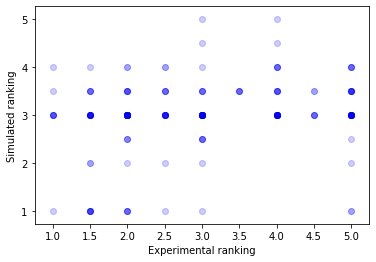

In [6]:
#creating scatterplot of rankings
i = 0
while i < rank_b.shape[0]:
    plt.scatter(rank_b.iloc[i], rank_f.iloc[i], alpha=0.2, c = 'b')
    i+=1
plt.xlabel('Experimental ranking')
plt.ylabel('Simulated ranking');

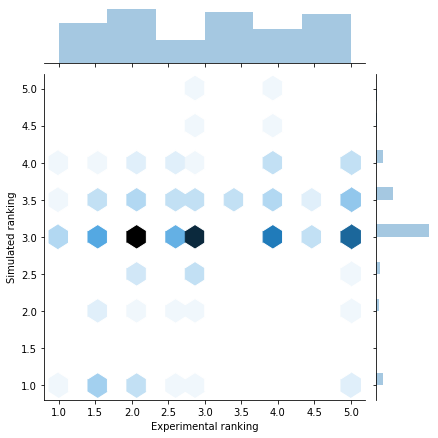

In [7]:
hexplot = seaborn.jointplot(rank_b, rank_f, kind = 'hex')
hexplot.set_axis_labels('Experimental ranking', 'Simulated ranking');

C:\Users\Caroline\Anaconda3\envs\capstone\lib\site-packages\numpy\lib\function_base.py:2534 RuntimeWarning: invalid value encountered in true_divide
C:\Users\Caroline\Anaconda3\envs\capstone\lib\site-packages\numpy\lib\function_base.py:2535 RuntimeWarning: invalid value encountered in true_divide
C:\Users\Caroline\Anaconda3\envs\capstone\lib\site-packages\scipy\stats\_distn_infrastructure.py:903 RuntimeWarning: invalid value encountered in greater
C:\Users\Caroline\Anaconda3\envs\capstone\lib\site-packages\scipy\stats\_distn_infrastructure.py:903 RuntimeWarning: invalid value encountered in less
C:\Users\Caroline\Anaconda3\envs\capstone\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912 RuntimeWarning: invalid value encountered in less_equal


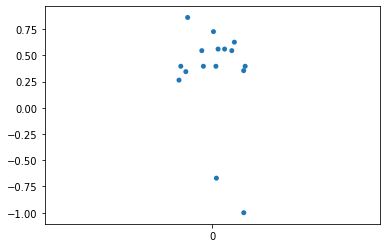

In [8]:
#ploting spearman correlation
from scipy.stats import spearmanr
i = 0
arr = [];
placeholder = pd.DataFrame(np.zeros((2,55)))
while i < fortyCP.shape[0]:
    if not np.isnan(spearmanr(rank_b.iloc[i],rank_f.iloc[i])[0]):
        arr.append(spearmanr(rank_b.iloc[i],rank_f.iloc[i])[0])
    i += 1
p = seaborn.stripplot(data=arr)

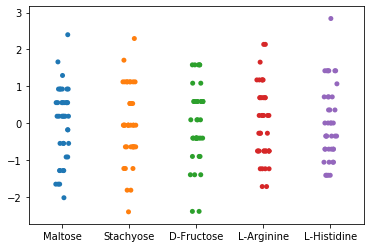

In [9]:
# plot of zscore(rank_biolog - rank_fba)
output = np.subtract(rank_b, rank_f)
output_z = output.apply(zscore)
p = seaborn.stripplot(data=output_z)

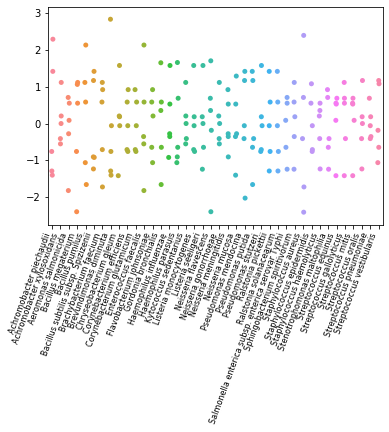

In [10]:
p = seaborn.stripplot(data=output_z.transpose())
p.set_xticklabels(output_z.index, rotation = 70, ha = 'right', size=8);

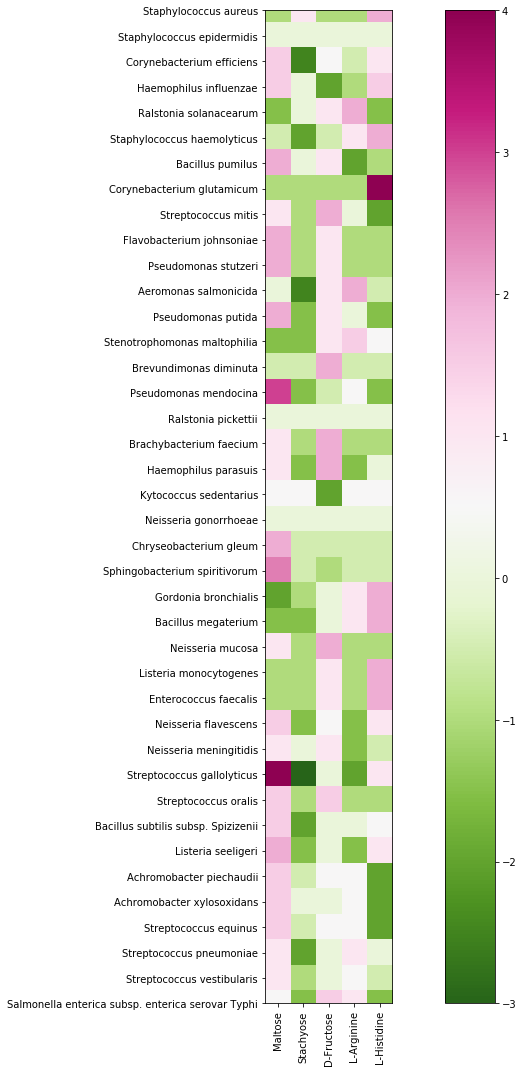

In [11]:
output = np.subtract(rank_b, rank_f)
fig, ax = plt.subplots()
im = ax.imshow(output,cmap='PiYG_r')
ax.set_xticks(np.arange(len(intersection)))
ax.set_xticklabels(intersection, rotation=90);
ax.set_yticks(np.arange(len(biolog_i.index)))
ax.set_yticklabels(biolog_i.index);
cb = plt.colorbar(im)

fig.set_size_inches(15, 15)
fig.tight_layout()

                                                    Maltose  Stachyose  \
Achromobacter piechaudii                          -1.290994   2.294118   
Achromobacter xylosoxidans                        -0.553283   1.117647   
Aeromonas salmonicida                              0.553283  -1.823529   
Bacillus megaterium                                0.553283   1.117647   
Bacillus pumilus                                  -1.659850   1.117647   
Bacillus subtilis subsp. Spizizenii               -0.922139  -1.235294   
Brachybacterium faecium                            0.922139   1.117647   
Brevundimonas diminuta                            -1.290994  -0.058824   
Chryseobacterium gleum                             0.184428  -0.058824   
Corynebacterium efficiens                          0.922139  -0.058824   
Corynebacterium glutamicum                         0.922139  -0.058824   
Enterococcus faecalis                             -0.553283  -1.823529   
Flavobacterium johnsoniae             

Text(0.5, 1.0, 'Histogram of Biolog/FVA comparison')

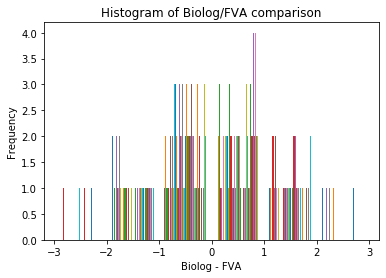

In [12]:
print(output_z)
#np.histogram(output)
plt.hist(output_z, bins = [-3 ,  -2,  -1,0,1, 2,3]); 
plt.xlabel('Biolog - FVA')
plt.ylabel('Frequency')
plt.title('Histogram of Biolog/FVA comparison')

Text(0.5, 1.0, 'Histogram of Biolog/pFVA comparison')

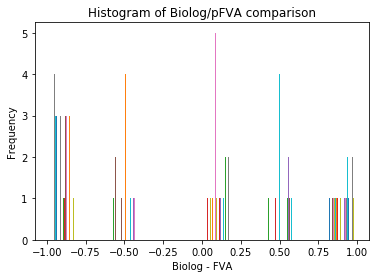

In [13]:
#np.histogram(output)
plt.hist(output, bins = [-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]); 
plt.xlabel('Biolog - FVA')
plt.ylabel('Frequency')
plt.title('Histogram of Biolog/pFVA comparison')